# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

Using the dataset of used cars, we want to find trends in seeing what factors make a car more or less expensive in order for our client to understand based on data what consumers value in a car. In order to give an overview of how I plan on acheiving such, I have divided my process into two main phases: data preparation and modeling. After these steps, I will provide an evaluation of my work.

The first phase will require me to understand the data and then from there perform some maintenance to clean the data. Cleaning the data will include dropping any bad entries, dealing with null values however I feel the right way should be, and formatting the dataset in a way that would make it easier for me to analyze it. From there, I will select five factors to investigate that I will provide an explanation as for why I believe that these factors will be important for not only answering our problem but as to why these factors are valued. Five should be a reasonable number as that should give me enough work done in case some factors are not as valued as I thought they were since if they aren't as valued then it would not be worth sharing that information with the client.

The second phase will involve me to take the factors that I decided would be worth testing and generate tests to see whether my hypothesises are correct or not. For each factor I will determine what techniques I will use to demonstrate whether the factor I chose to work on is valued by the customer or not. It is very important that we use the data to back up or refute my hypothesis. The models that I have generated will be a part of my report that I will show to my client.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

1. Read in the data.
2. Investigate the data for missing or problematic data.
3. Decide what to do with it (dropping or replacing).

In [1]:
# reading the data in
import pandas as pd
car = pd.read_csv('data/vehicles.csv')

In [2]:
# checking the data's current info
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [3]:
car.head(15)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
5,7222379453,hudson valley,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
6,7221952215,hudson valley,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7,7220195662,hudson valley,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
8,7209064557,medford-ashland,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or
9,7219485069,erie,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa


In [4]:
car.sample(15)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
309480,7309992724,tulsa,29800,1999.0,ford,f-350 drw lariat,excellent,NaN,diesel,142810.0,clean,automatic,NaN,4wd,NaN,NaN,NaN,ok
184903,7311912856,southern maryland,14495,2014.0,cadillac,ats,NaN,NaN,gas,75608.0,clean,automatic,1G6AA5RX1E0100424,rwd,compact,sedan,white,md
144276,7304488482,"quad cities, IA/IL",7900,2006.0,honda,ridgeline 4x4,NaN,NaN,gas,190000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,il
263627,7316239557,albany,0,2011.0,chevrolet,tahoe,excellent,8 cylinders,gas,152000.0,clean,automatic,NaN,4wd,NaN,SUV,red,ny
280614,7314609945,syracuse,18990,2014.0,ford,focus st hatchback 4d,good,NaN,other,63340.0,clean,other,1FADP3L94EL204241,fwd,NaN,hatchback,silver,ny
101994,7310265571,north central FL,700,2014.0,hyundai,elantra,NaN,NaN,gas,120000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,fl
419505,7306394148,la crosse,6977,2012.0,chevrolet,equinox ls,excellent,4 cylinders,gas,131852.0,clean,automatic,2GNALBEK6C1293419,NaN,NaN,NaN,NaN,wi
328164,7304737085,altoona-johnstown,40990,2014.0,chevrolet,silverado 2500 hd crew,good,8 cylinders,gas,53263.0,clean,other,1GC1CYEGXEF118352,NaN,NaN,pickup,white,pa
91077,7316290760,delaware,4900,2011.0,mazda,6 i grand touring,like new,4 cylinders,gas,176000.0,clean,manual,1YVHZ8BH7B5M27265,fwd,NaN,sedan,blue,de
234078,7309374959,charlotte,5900,2008.0,toyota,camry le,excellent,4 cylinders,gas,159321.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,nc


From seeing the last two cells, there are some entries that don't have any information on the car. However, there are some entries that are missing a few data. Rather than just dropping all NaN values (as we'd be losing some valuable information that way), I think it is only worth dropping an entry if the price is 0 (because there's no such thing as a free car) or if the year, manufacturer, and model are NaN (basic car information is necessary). This is the only cleaning I will do for now. Even though there are other NaN values, some of those entries have enough information provided in which that that entry can represent a car. Any other cleaning I will do individually for each factor that I decide to work on.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [5]:
# drop when price is 0
car = car[car['price'] != 0]

In [6]:
# drop when year, manufacturerern and model are NaN
car = car[car['year'].notna() & car['manufacturer'].notna() & car['model'].notna()]

In [7]:
# empty ones are gone
car.head(15)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
27,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,al
28,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,al
29,7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,al
30,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,NaN,NaN,pickup,red,al
31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,NaN,rwd,full-size,truck,black,al
32,7316343444,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,1GT220CG8CZ231238,4wd,NaN,pickup,black,al
33,7316304717,auburn,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,other,1GCVKREH6GZ228691,4wd,NaN,pickup,silver,al
34,7316285779,auburn,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,automatic,NaN,4wd,NaN,truck,grey,al
35,7316257769,auburn,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,1GCHTCE37G1186784,4wd,NaN,pickup,red,al
36,7316133914,auburn,38590,2011.0,chevrolet,corvette grand sport,good,8 cylinders,gas,30237.0,clean,other,1G1YR3DW3B5102190,rwd,NaN,other,red,al


The factors that I have chosen to test are fuel, distance traveled (odometer), and the transimission.

In [8]:
car['manufacturer'].value_counts()

ford               64199
chevrolet          49818
toyota             31407
honda              19768
jeep               17327
nissan             17291
ram                15649
gmc                15228
bmw                13633
dodge              12142
mercedes-benz      10344
hyundai             9335
subaru              8949
volkswagen          8820
lexus               7692
kia                 7509
audi                7147
cadillac            6518
acura               5683
chrysler            5608
buick               5131
mazda               5018
infiniti            4450
lincoln             3992
volvo               3183
mitsubishi          3095
mini                2245
pontiac             2192
jaguar              1877
rover               1697
porsche             1284
mercury             1119
saturn              1052
alfa-romeo           870
tesla                831
fiat                 767
harley-davidson      129
ferrari               64
datsun                62
aston-martin          21


In [9]:
ford = car.query("manufacturer == 'ford'")
ford.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,NaN,rwd,full-size,truck,black,al
44,7315275942,auburn,30990,2019.0,ford,ranger supercrew xl pickup,good,NaN,other,1834.0,clean,other,1FTER4EH3KLA31326,NaN,NaN,pickup,black,al
47,7314910156,auburn,34590,2018.0,ford,f150 super cab xl pickup 4d,good,6 cylinders,gas,20856.0,clean,other,1FTEX1CBXJKD41626,NaN,NaN,pickup,white,al
50,7314811909,auburn,38990,2020.0,ford,f150 supercrew cab xlt,good,6 cylinders,gas,12231.0,clean,other,1FTEW1CP4LFB84170,NaN,NaN,pickup,NaN,al
53,7314584322,auburn,27990,2020.0,ford,ranger supercab xl pickup,good,NaN,gas,10688.0,clean,other,1FTER1EH1LLA36301,NaN,NaN,pickup,white,al


In [10]:
chev = car.query("manufacturer == 'chevrolet'")
toyota = car.query("manufacturer == 'toyota'")

I decided to just test on Ford's car data to see how similar cars matchup with each other. This also helped me with running into issues where my model was too large to compute so my kernel would crash.

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

For this step, I will build a couple regression models to demonstrate the relationship between a specific factor and the price. Along the way I will cross-validate my findings. For this first one, I will investigate the relationship between the type of fuel a car has and how it affects its value. 

For this portion, I just created the models for each of the factors that I wanted to do. For the first one (fuels) I broke down my process into multiple cells just to test on the way to make sure I was doing each step correctly but the rest of the models I created, I will combine all the steps into one cell.

In [11]:
car['fuel'].value_counts()

gas         315793
other        26571
diesel       22268
hybrid        4815
electric      1543
Name: fuel, dtype: int64

In [12]:
# importing necessary libraries for building models
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

In [13]:
# clean others
ford_fuels = ford.query("fuel != 'other'")
ford_fuels.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,NaN,rwd,full-size,truck,black,al
47,7314910156,auburn,34590,2018.0,ford,f150 super cab xl pickup 4d,good,6 cylinders,gas,20856.0,clean,other,1FTEX1CBXJKD41626,NaN,NaN,pickup,white,al
50,7314811909,auburn,38990,2020.0,ford,f150 supercrew cab xlt,good,6 cylinders,gas,12231.0,clean,other,1FTEW1CP4LFB84170,NaN,NaN,pickup,NaN,al
53,7314584322,auburn,27990,2020.0,ford,ranger supercab xl pickup,good,NaN,gas,10688.0,clean,other,1FTER1EH1LLA36301,NaN,NaN,pickup,white,al
55,7314560853,auburn,19900,2004.0,ford,f250 super duty,good,8 cylinders,diesel,88000.0,clean,automatic,NaN,4wd,full-size,pickup,blue,al


To build a model that accurately makes predictions, we need to be able to differentiate between each models. The features that I will track in order to make the model are the price, the manufacturer, the model (as prices differ for models), the year, and the fuel. To simplify this process, I made a new dataframe that tracks all these features.

In [26]:
# create new dataframe ford_fuels_db with manufacturer, model, year, and fuels
ff_features = ['model', 'year', 'fuel']
ff_data = pd.DataFrame(ford_fuels[ff_features])
ff_data.head()


,model,year,fuel
31,f-150 xlt,2013.0,gas
47,f150 super cab xl pickup 4d,2018.0,gas
50,f150 supercrew cab xlt,2020.0,gas
53,ranger supercab xl pickup,2020.0,gas
55,f250 super duty,2004.0,diesel


In [27]:
# use get_dummies for model and fuel columns before adding to new dataframe

In [28]:
ff_fuel_dummies = pd.get_dummies(ff_data['fuel'])
ff_model_dummies = pd.get_dummies(ff_data['model'])

# add columns to car fuel data
ff_data = pd.concat([ff_data, ff_fuel_dummies, ff_model_dummies], axis = 1)
ff_data.head()

,model,year,fuel,diesel,electric,gas,hybrid,"""t""",#NAME?,-150 xlt,...,workhorse,xl,xl convertible,xls explorer,xlt,xlt econoline e350,xlt f-350 diesel 4x4,xlt f150,xlt x-cab,zx2
31,f-150 xlt,2013.0,gas,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47,f150 super cab xl pickup 4d,2018.0,gas,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50,f150 supercrew cab xlt,2020.0,gas,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,ranger supercab xl pickup,2020.0,gas,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55,f250 super duty,2004.0,diesel,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# delete string columns
del ff_data['model']
# del ff_data['manufacturer']
ff_data.head()

,year,fuel,diesel,electric,gas,hybrid,"""t""",#NAME?,-150 xlt,-350,...,workhorse,xl,xl convertible,xls explorer,xlt,xlt econoline e350,xlt f-350 diesel 4x4,xlt f150,xlt x-cab,zx2
31,2013.0,gas,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47,2018.0,gas,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50,2020.0,gas,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,2020.0,gas,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55,2004.0,diesel,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
del ff_data['fuel']
ff_data.head()

,year,diesel,electric,gas,hybrid,"""t""",#NAME?,-150 xlt,-350,/vmi conversion van,...,workhorse,xl,xl convertible,xls explorer,xlt,xlt econoline e350,xlt f-350 diesel 4x4,xlt f150,xlt x-cab,zx2
31,2013.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47,2018.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50,2020.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,2020.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55,2004.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# create regression function
ff_f = LinearRegression(fit_intercept = False)

ff_f.fit(ff_data, ford_fuels['price'])

LinearRegression(fit_intercept=False)

In [32]:
# make predictions column
ff_data['predictions'] = ff_f.predict(ff_data)

In [33]:
ff_data.head()

,year,diesel,electric,gas,hybrid,"""t""",#NAME?,-150 xlt,-350,/vmi conversion van,...,xl,xl convertible,xls explorer,xlt,xlt econoline e350,xlt f-350 diesel 4x4,xlt f150,xlt x-cab,zx2,predictions
31,2013.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17980.689327
47,2018.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,23800.486899
50,2020.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1628.864171
53,2020.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,28891.416431
55,2004.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,75504.713283


In [34]:
ford_fuels['predictions'] = ff_data['predictions']
ford_fuels.head()

/var/folders/db/9wh3trcj77zg1vgcffgcn9c00000gn/T/ipykernel_41207/3646057207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ford_fuels['predictions'] = ff_data['predictions']


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,predictions
31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,NaN,rwd,full-size,truck,black,al,17980.689327
47,7314910156,auburn,34590,2018.0,ford,f150 super cab xl pickup 4d,good,6 cylinders,gas,20856.0,clean,other,1FTEX1CBXJKD41626,NaN,NaN,pickup,white,al,23800.486899
50,7314811909,auburn,38990,2020.0,ford,f150 supercrew cab xlt,good,6 cylinders,gas,12231.0,clean,other,1FTEW1CP4LFB84170,NaN,NaN,pickup,NaN,al,1628.864171
53,7314584322,auburn,27990,2020.0,ford,ranger supercab xl pickup,good,NaN,gas,10688.0,clean,other,1FTER1EH1LLA36301,NaN,NaN,pickup,white,al,28891.416431
55,7314560853,auburn,19900,2004.0,ford,f250 super duty,good,8 cylinders,diesel,88000.0,clean,automatic,NaN,4wd,full-size,pickup,blue,al,75504.713283


Below is the work done to make the model for the odometer feature.

In [44]:
# clean the odometer data
ford_odm_null_count = ford['odometer'].isna().sum()
print(ford_odm_null_count)
ford_odometer = ford.query("odometer.isna() == False")
print(ford_odometer['odometer'].isna().sum())

313
0


In [46]:
fo_features = ['model', 'year', 'odometer']
fo_data = pd.DataFrame(ford_odometer[fo_features])

fo_model_dummies = pd.get_dummies(fo_data['model'])
fo_data = pd.concat([fo_data, fo_model_dummies], axis = 1)
del fo_data['model']

fo_f = LinearRegression(fit_intercept = False)
fo_f.fit(fo_data, ford_odometer['price'])
fo_data['predictions'] = fo_f.predict(fo_data)

fo_data.head()

,year,odometer,"""t""",#NAME?,-150 xlt,-350,.. ect.,/vmi conversion van,100,15 passenger shuttle van,...,xl,xl convertible,xls explorer,xlt,xlt econoline e350,xlt f-350 diesel 4x4,xlt f150,xlt x-cab,zx2,predictions
31,2013.0,128000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18450.877099
44,2019.0,1834.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,32087.655513
47,2018.0,20856.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8849.281016
50,2020.0,12231.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8987.635772
53,2020.0,10688.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,28530.742366


In [47]:
ford_odometer.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,NaN,rwd,full-size,truck,black,al
44,7315275942,auburn,30990,2019.0,ford,ranger supercrew xl pickup,good,NaN,other,1834.0,clean,other,1FTER4EH3KLA31326,NaN,NaN,pickup,black,al
47,7314910156,auburn,34590,2018.0,ford,f150 super cab xl pickup 4d,good,6 cylinders,gas,20856.0,clean,other,1FTEX1CBXJKD41626,NaN,NaN,pickup,white,al
50,7314811909,auburn,38990,2020.0,ford,f150 supercrew cab xlt,good,6 cylinders,gas,12231.0,clean,other,1FTEW1CP4LFB84170,NaN,NaN,pickup,NaN,al
53,7314584322,auburn,27990,2020.0,ford,ranger supercab xl pickup,good,NaN,gas,10688.0,clean,other,1FTER1EH1LLA36301,NaN,NaN,pickup,white,al


Below is the work done for transimission.

In [49]:
# clean up data for modeling
ford['transmission'].value_counts()
ford_t = ford.query("transmission != 'other'")
ford_t.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,NaN,rwd,full-size,truck,black,al
55,7314560853,auburn,19900,2004.0,ford,f250 super duty,good,8 cylinders,diesel,88000.0,clean,automatic,NaN,4wd,full-size,pickup,blue,al
65,7312847466,auburn,22500,2001.0,ford,f450,good,8 cylinders,diesel,144700.0,clean,manual,NaN,rwd,full-size,truck,white,al
173,7316871664,birmingham,18950,2010.0,ford,f150 lariat supercrew 4x4,good,8 cylinders,gas,151403.0,clean,automatic,NaN,4wd,NaN,pickup,black,al
175,7316870942,birmingham,12500,2008.0,ford,ranger xlt,excellent,6 cylinders,gas,141345.0,clean,automatic,NaN,rwd,NaN,truck,grey,al


In [50]:
ft_features = ['model', 'year', 'transmission']
ft_data = pd.DataFrame(ford_t[ft_features])

ft_model_dummies = pd.get_dummies(ft_data['model'])
ft_t_dummies = pd.get_dummies(ft_data['transmission'])
ft_data = pd.concat([ft_data, ft_model_dummies, ft_t_dummies], axis = 1)
del ft_data['model']
del ft_data['transmission']

ft_f = LinearRegression(fit_intercept = False)
ft_f.fit(ft_data, ford_t['price'])
ft_data['predictions'] = ft_f.predict(ft_data)

ft_data.head()

,year,#NAME?,-150 xlt,-350,/vmi conversion van,100,15 passenger shuttle van,150,150 4wd,150 4x4,...,xls explorer,xlt,xlt econoline e350,xlt f-350 diesel 4x4,xlt f150,xlt x-cab,zx2,automatic,manual,predictions
31,2013.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,18597.745634
55,2004.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,55201.444819
65,2001.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1112.143132
173,2010.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,44376.254123
175,2008.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3120.148871


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [40]:
# FORD FUELS EVALUATION: get the means of each gas type for data and model. 
# Whichever average is higher means that the cost of that specific gas type
# is higher which correlates to that the customer values X gas type more than others.

ff_diesel_model_mean = ff_data.query("diesel == 1")['predictions'].mean()
ff_diesel_data_mean = ford_fuels.query("fuel == 'diesel'")['price'].mean()
ff_gas_model_mean = ff_data.query("gas == 1")['predictions'].mean()
ff_gas_data_mean = ford_fuels.query("fuel == 'gas'")['price'].mean()
ff_hybrid_model_mean = ff_data.query("hybrid == 1")['predictions'].mean()
ff_hybrid_data_mean = ford_fuels.query("fuel == 'hybrid'")['price'].mean()
ff_electric_model_mean = ff_data.query("electric == 1")['predictions'].mean()
ff_electric_data_mean = ford_fuels.query("fuel == 'electric'")['price'].mean()

print("Mean model diesel-ran Ford price: ")
print(ff_diesel_model_mean)
print("Mean data diesel-ran Ford price: ")
print(ff_diesel_data_mean)
print("Mean model gas-ran Ford price: ")
print(ff_gas_model_mean)
print("Mean data gas-ran Ford price: ")
print(ff_gas_data_mean)
print("Mean model hybrid-ran Ford price: ")
print(ff_hybrid_model_mean)
print("Mean data hybrid-ran Ford price: ")
print(ff_hybrid_data_mean)
print("Mean model electric-ran Ford price: ")
print(ff_electric_model_mean)
print("Mean data electric-ran Ford price: ")
print(ff_electric_data_mean)

Mean model diesel-ran Ford price: 
159191.42035619362
Mean data diesel-ran Ford price: 
159191.42035646227
Mean model gas-ran Ford price: 
20007.708425599474
Mean data gas-ran Ford price: 
20007.70842574277
Mean model hybrid-ran Ford price: 
14299.45186378873
Mean data hybrid-ran Ford price: 
14299.451863354037
Mean model electric-ran Ford price: 
15024.097220815614
Mean data electric-ran Ford price: 
15024.097222222223


Given these numeric values, I have enough evidence to show that customers would typically value diesel ran cars more than others. The means calcualted from the model predictions and the means calculated from the data are very similar as well so they support each other.

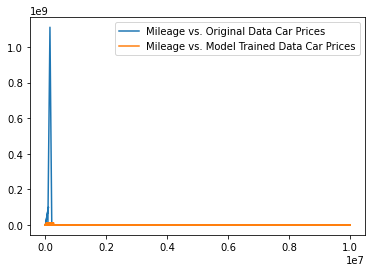

In [61]:
# prepare odometer prices and model predicted prices and data existing prices into one dataframe
fo_info = pd.concat([ford_odometer['odometer'], ford_odometer['price'], fo_data['predictions']], axis = 1)
# Show a scatterplot graph showing the odometer and price  
# plot lines
plt.plot(fo_info['odometer'], fo_info['price'], label = "Mileage vs. Original Data Car Prices")
plt.plot(fo_info['odometer'], fo_info['predictions'], label = "Mileage vs. Model Trained Data Car Prices")
plt.legend()
plt.show()

The data line looks tough however it shows that the prices peak around 1000-10000 miles traveled meaning that a car will have more value the less it is used. The price significantly drops off around after that range. The model line while small to see also shows that the prices peaking around that range, but not to the same degree as the data. While both the model and the data support each other, the approach could be improved with a logistic or polynomial regression model. However, this information is still worth deploying.

In [51]:
# FORD TRANSMISSION EVALUATION similar to gas
ft_manual_model_mean = ft_data.query("manual == 1")['predictions'].mean()
ft_manual_data_mean = ford_t.query("transmission == 'manual'")['price'].mean()
ft_auto_model_mean = ft_data.query("automatic == 1")['predictions'].mean()
ft_auto_data_mean = ford_t.query("transmission == 'automatic'")['price'].mean()

print("Mean of model ran automatic transmission prices: ")
print(ft_auto_model_mean)
print("Mean of data automatic transmission prices: ")
print(ft_auto_data_mean)
print("Mean of model ran manual transmission prices: ")
print(ft_manual_model_mean)
print("Mean of data manual transmission prices: ")
print(ft_manual_data_mean)

Mean of model ran automatic transmission prices: 
42813.320219277404
Mean of data automatic transmission prices: 
42813.32021917808
Mean of model ran manual transmission prices: 
15200.683008992943
Mean of data manual transmission prices: 
15200.683011248919


Since I was able to take a similar approach for evaluating transmissions like how I did with fuels, I was able to get concrete evidence in that consumers would most likely prefer automatic cars compared to manual as that price is higher therefore it is more valued.

Some ways that this could be imporved is if I would be able to test for all models made by all the manufacturers in the dataset, however I was not able to due to the fact that I was constantly timing out when I initially tried. The reason I chose to only work with the Ford dataset as that was the most populated manufacturer in the database and in order to gain an accurate view on how certain features were valued, I needed to compare similar cars and how the feature that I was testing for would affect the price and value. Another way I could have further validated my findings is by doing a similar approach with a different car manufacturer such as Chevrolet since that was the second most populated car manufacturer.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

From the data and the model that was trained by the data, we can show that consumers would value diesel-ran cars more than gas, hybrid, or electric. It is also important that the average price of diesel-ran cars is significantly higher than the second highest average which was gas meaning that there is more value in diesel-ran cars.

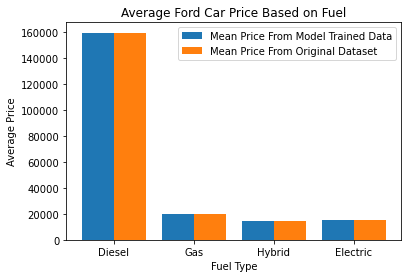

In [52]:
# Represent the means from the ford fuels values in a bar graph

import numpy as np 
import matplotlib.pyplot as plt

gas_types = ['Diesel', 'Gas', 'Hybrid', 'Electric']
model_means = [ff_diesel_model_mean, ff_gas_model_mean, ff_hybrid_model_mean, ff_electric_model_mean]
data_means = [ff_diesel_data_mean, ff_gas_data_mean, ff_hybrid_data_mean, ff_electric_data_mean]
gt_axis = np.arange(len(gas_types))
  
plt.bar(gt_axis - 0.2, model_means, 0.4, label = 'Mean Price From Model Trained Data')
plt.bar(gt_axis + 0.2, data_means, 0.4, label = 'Mean Price From Original Dataset')
  
plt.xticks(gt_axis, gas_types)
plt.xlabel("Fuel Type")
plt.ylabel("Average Price")
plt.title("Average Ford Car Price Based on Fuel")
plt.legend()
plt.show()

While it may be hard to tell from the chart, the data line shows that the prices peak around 1000-10000 miles traveled meaning that a car will have more value the less it is used. The price significantly drops off around after that range. The model line while small to see also shows that the prices peaking around that range, but not to the same degree as the data. Therefore, if cars have travelled more than 10000 miles, then the car will lower significantly in value.

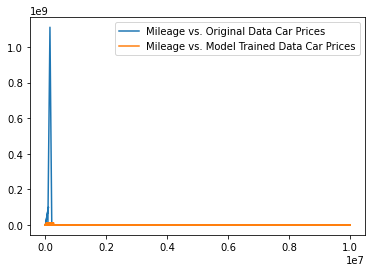

In [62]:
# plot lines
plt.plot(fo_info['odometer'], fo_info['price'], label = "Mileage vs. Original Data Car Prices")
plt.plot(fo_info['odometer'], fo_info['predictions'], label = "Mileage vs. Model Trained Data Car Prices")
plt.legend()
plt.show()

From the data and the model, we can show customers value automatic cars more than they value manual as the average price for Ford's automatic vehicles is $42,813 while the average price for their manual ones are $15,200. 

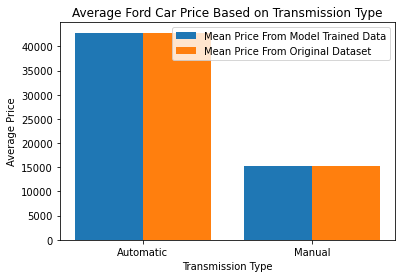

In [55]:
# Represent the means from the ford transmission values in a bar graph like ford fuels
t_types = ['Automatic', 'Manual']
model_means = [ft_auto_model_mean, ft_manual_model_mean]
data_means = [ft_auto_data_mean, ft_manual_data_mean]
t_axis = np.arange(len(t_types))
  
plt.bar(t_axis - 0.2, model_means, 0.4, label = 'Mean Price From Model Trained Data')
plt.bar(t_axis + 0.2, data_means, 0.4, label = 'Mean Price From Original Dataset')
  
plt.xticks(t_axis, t_types)
plt.xlabel("Transmission Type")
plt.ylabel("Average Price")
plt.title("Average Ford Car Price Based on Transmission Type")
plt.legend()
plt.show()